#Theoretical

### 1. What is a Decision Tree, and how does it work?

A decision tree is a type of supervised machine learning algorithm that's used for both classification and regression tasks.  It's a tree-like structure where each internal node represents a "decision" or "test" on a feature (or attribute), each branch represents the outcome of the test, and each leaf node represents the final outcome (a class label or a predicted value).

Here's a breakdown of how it works:

**1. Building the Tree (Training Phase):**

*   **Data Preparation:** The algorithm starts with a dataset of labeled examples (input features and corresponding target values).
*   **Feature Selection:** The core of the algorithm is how it chooses which feature to split on at each node.  It aims to select the feature that best separates the data into more homogeneous subsets with respect to the target variable.  Common criteria for feature selection include:
    *   **Gini Impurity (for classification):** Measures the impurity of a set of samples.  A lower Gini impurity indicates a more homogeneous set. The goal is to minimize the weighted average of the Gini impurities of the child nodes.
    *   **Information Gain (for classification):** Measures the reduction in entropy (uncertainty) achieved by splitting the data on a particular feature.  The feature with the highest information gain is chosen.
    *   **Mean Squared Error (for regression):** Measures the average squared difference between the predicted values and the actual values.  The goal is to minimize this error.
*   **Splitting:** Once a feature is selected, the algorithm splits the data into subsets based on the possible values or ranges of that feature.  For categorical features, there's a branch for each category. For numerical features, the algorithm often finds an optimal threshold to split the data (e.g., values less than or equal to the threshold go down one branch, and values greater than the threshold go down the other).
*   **Recursion:** This process of feature selection and splitting is repeated recursively for each subset until a stopping criterion is met.  Common stopping criteria include:
    *   All samples in a subset belong to the same class (for classification).
    *   A maximum tree depth is reached.
    *   A minimum number of samples are required at a leaf node.
    *   No more features are available to split on.
*   **Leaf Node Assignment:** When a leaf node is reached, it's assigned a value.  For classification, this is the most frequent class among the samples in that leaf. For regression, it's typically the average (or median) of the target values of the samples in that leaf.

**2. Making Predictions (Testing Phase):**

*   **Input:** Given a new, unseen data point with its features.
*   **Traversal:** The algorithm starts at the root node of the decision tree.
*   **Decision at Each Node:** At each internal node, the algorithm checks the value of the corresponding feature in the input data point.  It then follows the branch corresponding to that value.
*   **Leaf Node:** This process continues until a leaf node is reached.
*   **Output:** The value assigned to the leaf node is the predicted outcome for the input data point (a class label for classification or a numerical value for regression).




###2. What are impurity measures in Decision Trees?

In decision trees, impurity measures are crucial for determining the best way to split the data at each node. They quantify the "disorder" or "mixed-up-ness" of the classes within a set of data points. The goal is to find splits that reduce this impurity, creating subsets that are as "pure" as possible, meaning they contain mostly (or ideally, only) examples from a single class.

Here's a breakdown of the two most common impurity measures:

**1. Gini Impurity:**

*   **What it measures:** The Gini impurity measures the probability of misclassifying a randomly chosen element in the dataset if it were labeled randomly according to the distribution of classes in the set.
*   **How it works:**
    *   For each class in the dataset, calculate the proportion of examples belonging to that class.
    *   Square each of these proportions.
    *   Sum up all the squared proportions.
    *   Subtract this sum from 1.
*   **Range:** Gini impurity ranges from 0 to 0.5.
    *   0 means perfect purity (all examples belong to the same class).
    *   0.5 means maximum impurity (classes are evenly distributed).
*   **Advantages:**
    *   Computationally simpler and faster than entropy.
    *   Often preferred in practical implementations of decision trees.
*   **Disadvantages:**
    *   Slightly biased towards larger partitions.

**2. Entropy:**

*   **What it measures:** Entropy is a measure of the amount of uncertainty or disorder in a set of data. In the context of decision trees, it measures the uncertainty about the class labels in a node.
*   **How it works:**
    *   For each class in the dataset, calculate the proportion of examples belonging to that class.
    *   Multiply each proportion by the logarithm base 2 of that proportion (with a negative sign).
    *   Sum up all these values.
*   **Range:** Entropy ranges from 0 to 1.
    *   0 means perfect purity (all examples belong to the same class).
    *   1 means maximum impurity (classes are evenly distributed).
*   **Advantages:**
    *   Considers the distribution of data more comprehensively than Gini impurity.
    *   More commonly used in theoretical discussions and some decision tree algorithms (like C4.5 and ID3).
*   **Disadvantages:**
    *   More computationally intensive than Gini impurity.





###3. What is the mathematical formula for Gini Impurity?

The mathematical formula for Gini Impurity is:

```
Gini Impurity = 1 - Σ (pᵢ)²
```

Where:

*   `pᵢ` is the proportion of samples belonging to class `i`.
*   `Σ` represents the sum over all classes.

Let's break it down:

1.  **`pᵢ`:** For each class in your dataset, you calculate the proportion (or probability) of samples that belong to that class.  For example, if you have a dataset with two classes (positive and negative), and 60% of the samples are positive, then `p_positive = 0.6` and `p_negative = 0.4`.

2.  **`pᵢ²`:** You square each of these proportions.  In the example above, `p_positive² = 0.6² = 0.36` and `p_negative² = 0.4² = 0.16`.

3.  **`Σ (pᵢ)²`:** You sum up all the squared proportions.  In our example, `0.36 + 0.16 = 0.52`.

4.  **`1 - Σ (pᵢ)²`:** Finally, you subtract the sum of squared proportions from 1.  In our example, `1 - 0.52 = 0.48`.  This is the Gini impurity for that node or subset of data.

**Example:**

Let's say you have a node with 10 samples: 6 belong to class A and 4 belong to class B.

1.  `p_A = 6/10 = 0.6`
2.  `p_B = 4/10 = 0.4`
3.  `p_A² = 0.36`
4.  `p_B² = 0.16`
5.  `Σ (pᵢ)² = 0.36 + 0.16 = 0.52`
6.  `Gini Impurity = 1 - 0.52 = 0.48`

**Interpretation:**

*   A Gini impurity of 0 means perfect purity (all samples belong to the same class).
*   A Gini impurity of 0.5 (for a binary classification problem) means maximum impurity (classes are evenly distributed).  The closer the Gini impurity is to 0, the better the split (in terms of creating more homogeneous subsets).


###4. What is the mathematical formula for Entropy?

The mathematical formula for entropy, specifically as used in decision trees (and information theory in general), is:

```
Entropy(S) = - Σ (pᵢ * log₂(pᵢ))
```

Where:

*   `Entropy(S)` represents the entropy of the set `S` (the set of data points at a particular node).
*   `pᵢ` is the proportion of samples in `S` that belong to class `i`.
*   `Σ` represents the sum over all classes.
*   `log₂(pᵢ)` is the logarithm base 2 of `pᵢ`.

Let's break it down step by step:

1.  **`pᵢ`:**  For each class `i` in your dataset, calculate the proportion of samples that belong to that class within the current subset `S`.  For example, if you have a binary classification problem (positive and negative) and 70% of the samples in the current node are positive, then `p_positive = 0.7` and `p_negative = 0.3`.

2.  **`log₂(pᵢ)`:** Take the base-2 logarithm of each `pᵢ`.  In our example, `log₂(0.7) ≈ -0.515` and `log₂(0.3) ≈ -1.737`.  You can use a calculator or programming language to compute these logarithms.

3.  **`pᵢ * log₂(pᵢ)`:** Multiply each `pᵢ` by its corresponding `log₂(pᵢ)`. In our example, `0.7 * -0.515 ≈ -0.3605` and `0.3 * -1.737 ≈ -0.5211`.

4.  **`- Σ (pᵢ * log₂(pᵢ))`:** Sum up all the values calculated in the previous step and then multiply the entire sum by -1.  In our example, `-(-0.3605 + -0.5211) ≈ 0.8816`. This is the entropy for that node or subset of data.

**Example:**

Let's say you have a node with 10 samples: 7 belong to class A and 3 belong to class B.

1.  `p_A = 7/10 = 0.7`
2.  `p_B = 3/10 = 0.3`
3.  `log₂(0.7) ≈ -0.515`
4.  `log₂(0.3) ≈ -1.737`
5.  `p_A * log₂(p_A) ≈ -0.3605`
6.  `p_B * log₂(p_B) ≈ -0.5211`
7.  `Entropy(S) ≈ -(-0.3605 + -0.5211) ≈ 0.8816`

**Interpretation:**

*   An entropy of 0 means perfect purity (all samples belong to the same class).
*   An entropy of 1 (for a binary classification problem) means maximum impurity (classes are evenly distributed). The higher the entropy, the more "mixed up" the classes are in that node.  The goal when building a decision tree is to find splits that *reduce* entropy.



### 5. What is Information Gain, and how is it used in Decision Trees?

Information Gain is a key concept in decision tree algorithms. It's a measure of how much "information" a feature provides about the target variable. In simpler terms, it tells you how well a feature separates the data into different classes.

Here's a breakdown:

**What it measures:**

Information Gain measures the reduction in entropy (uncertainty) achieved by splitting the data on a particular feature. The feature with the highest information gain is chosen to split the data at each node of the decision tree.

**How it works:**

1.  **Calculate the initial entropy:** First, calculate the entropy of the entire dataset before any split. This represents the initial uncertainty about the class labels.

2.  **Calculate entropy after splitting:** For each feature, consider all possible ways to split the data based on that feature. Calculate the entropy of the subsets created by each split.

3.  **Calculate weighted average entropy:** Calculate the weighted average of the entropies of the subsets. The weights are the proportions of samples that go into each subset.

4.  **Calculate Information Gain:** Subtract the weighted average entropy of the subsets from the initial entropy. This gives you the information gain for that feature.

5.  **Choose the best split:** Select the feature that has the highest information gain. This is the feature that best reduces the uncertainty about the class labels.

**Mathematical Formula:**

```
Information Gain(S, A) = Entropy(S) - Σ (|Sv| / |S|) * Entropy(Sv)
```

Where:

*   `Information Gain(S, A)` is the information gain for splitting set `S` on attribute `A`.
*   `Entropy(S)` is the entropy of the set `S` before the split.
*   `|S|` is the number of samples in set `S`.
*   `|Sv|` is the number of samples in subset `Sv` (the subset created by splitting on value `v` of attribute `A`).
*   `Entropy(Sv)` is the entropy of the subset `Sv`.
*   `Σ` represents the sum over all values `v` of attribute `A`.




### 6. What is the difference between Gini Impurity and Entropy?

Gini impurity and entropy are both measures of impurity used in decision trees to determine the best way to split the data at each node. While they both aim to quantify the "disorder" or "mixed-up-ness" of classes within a set of data points, they have some key differences:

**1. Formula and Calculation:**

*   **Gini Impurity:** `Gini Impurity = 1 - Σ (pᵢ)²`
    *   It's calculated by squaring the proportion of samples belonging to each class, summing these squares, and subtracting the sum from 1.
*   **Entropy:** `Entropy(S) = - Σ (pᵢ * log₂(pᵢ))`
    *   It's calculated by multiplying the proportion of samples belonging to each class by the logarithm (base 2) of that proportion, summing these values, and then negating the sum.

**2. Range of Values:**

*   **Gini Impurity:** Ranges from 0 to 0.5.
    *   0 means perfect purity (all samples belong to the same class).
    *   0.5 means maximum impurity (classes are evenly distributed).
*   **Entropy:** Ranges from 0 to 1.
    *   0 means perfect purity.
    *   1 means maximum impurity.

**3. Computational Complexity:**

*   **Gini Impurity:** Computationally simpler and faster to calculate because it involves only squaring and summing proportions.
*   **Entropy:** More computationally intensive due to the use of logarithms, which can be slower to compute.

**4. Sensitivity to Class Distribution:**

*   **Entropy:** Considered to be slightly more sensitive to changes in class distribution, as it takes into account the logarithmic relationship between proportions and impurity.
*   **Gini Impurity:** Slightly less sensitive to changes in class distribution.

**5. Bias towards Larger Partitions:**

*   **Gini Impurity:** Slightly biased towards creating larger partitions during splits.
*   **Entropy:** Less biased in this regard.

**6. Practical Use:**

*   **Gini Impurity:** Often preferred in practical implementations of decision trees due to its computational efficiency.
*   **Entropy:** More commonly used in theoretical discussions and some decision tree algorithms (like C4.5 and ID3).

**In Summary:**

*   Gini impurity is computationally faster and simpler, making it a good choice for large datasets.
*   Entropy is slightly more accurate and considers the class distribution more comprehensively, but it's computationally more expensive.

**Which one to use?**

In most cases, the choice between Gini impurity and entropy doesn't significantly affect the performance of the decision tree. Gini impurity is often preferred due to its speed, but entropy might be preferred in some specific scenarios or for theoretical reasons. Many machine learning libraries allow you to choose either criterion when training decision trees.


### 7. What is the mathematical explanation behind Decision Trees?

 Here's a breakdown of the key mathematical concepts:

**1. Impurity Measures (Gini Impurity & Entropy)**

*   **Gini Impurity:**
    *   Formula: `Gini Impurity = 1 - Σ (pᵢ)²`
    *   `pᵢ` is the proportion of samples belonging to class `i`.
    *   This measures how mixed up the classes are in a node. A pure node (all samples same class) has Gini = 0. A maximally impure node (equal class distribution) has Gini closer to 0.5 (for binary classification).
*   **Entropy:**
    *   Formula: `Entropy(S) = - Σ (pᵢ * log₂(pᵢ))`
    *   `pᵢ` is the proportion of samples belonging to class `i`.
    *   This measures the uncertainty in a node. A pure node has Entropy = 0. A maximally impure node has Entropy closer to 1 (for binary classification).

**2. Information Gain**

*   **Formula:** `Information Gain(S, A) = Entropy(S) - Σ (|Sv| / |S|) * Entropy(Sv)`
    *   `S` is the set of samples at a node.
    *   `A` is a feature we're considering to split on.
    *   `Sv` are the subsets of `S` created by splitting on `A`.
    *   `|S|` and `|Sv|` are the number of samples in those sets.
    *   This measures how much splitting on feature `A` reduces the uncertainty. We want to maximize Information Gain.

**3. Splitting Criteria**

*   Decision trees use these impurity measures and Information Gain to decide the best feature to split on at each node.
*   The algorithm calculates the Information Gain for all features and chooses the one with the highest gain. This means that feature best separates the data according to class labels.

**4. Recursive Partitioning**

*   This splitting process is repeated recursively for each child node until a stopping criterion is met:
    *   All samples in a node belong to the same class (pure node).
    *   Maximum tree depth is reached.
    *   Minimum number of samples per leaf node is reached.

**5. Mathematical Representation of the Tree**

*   A decision tree can be seen as a piecewise constant function. Each leaf node represents a region in the feature space, and the value assigned to the leaf is the prediction for that region.
*   The decision boundaries are hyperplanes perpendicular to the feature axes.

**6. Overfitting and Regularization**

*   Decision trees are prone to overfitting, where they learn the training data too well, including noise, and don't generalize well to new data.
*   To prevent this, techniques like pruning are used:
    *   **Pre-pruning:** Stop growing the tree early based on criteria like maximum depth or minimum samples per leaf.
    *   **Post-pruning:** Grow the tree fully and then remove branches that don't improve performance on a validation set.

**7. Mathematical Formulation of Pruning**

*   Pruning can be formulated as an optimization problem, where we want to find the subtree that minimizes a cost function that balances the tree size and the misclassification error.
*   This can involve concepts like cost complexity pruning, which introduces a penalty for larger trees.

**Key Mathematical Tools Used**

*   **Probability and Statistics:** Proportions, probabilities, entropy calculations.
*   **Logarithms:** Used in entropy calculation.
*   **Linear Algebra:** Representing data and decision boundaries.
*   **Optimization:** Finding the best splits and pruning the tree.

**In essence, decision trees are built using a combination of information theory (entropy, information gain), statistical measures (proportions), and optimization techniques to find the best way to partition the data and make predictions.**




### 8. What is Pre-Pruning in Decision Trees?

Pre-pruning, also known as early stopping, is a technique used in decision trees to prevent overfitting. Overfitting occurs when the tree becomes too complex and learns the training data too well, including noise and outliers. This leads to poor performance on unseen data.

**How it works:**

Pre-pruning involves stopping the growth of the decision tree *before* it reaches its full potential. This is done by setting certain constraints or thresholds that limit the tree's depth and complexity. The tree stops splitting further when any of these conditions are met.

**Common Pre-pruning Techniques:**

*   **Maximum Depth:** Limits the maximum depth of the tree. Once the tree reaches this depth, it stops growing, even if further splits could potentially improve accuracy on the training data.
*   **Minimum Samples per Leaf:** Sets a minimum number of samples required to be in a leaf node. If a split would result in a leaf node with fewer samples than this threshold, the split is not performed.
*   **Minimum Samples per Split:** Specifies the minimum number of samples required to split an internal node. If a node has fewer samples than this threshold, it is not split further.
*   **Maximum Features:** Limits the number of features considered for splitting at each node. This can help to prevent the tree from becoming too complex and also speed up the training process.

**Advantages of Pre-pruning:**

*   **Reduces Overfitting:** By stopping the tree's growth early, it avoids capturing noise and outliers in the training data, leading to better generalization on unseen data.
*   **Faster Training:** Pre-pruning results in smaller trees, which are faster to train and easier to interpret.

**Disadvantages of Pre-pruning:**

*   **Risk of Underfitting:** If the stopping criteria are too strict, the tree might be too shallow to capture important patterns in the data, leading to underfitting. Underfitting occurs when the model is too simple to learn the underlying structure of the data, resulting in poor performance on both training and unseen data.

**Key Considerations:**

*   The effectiveness of pre-pruning depends on carefully tuning the hyperparameters that control the stopping criteria. These hyperparameters are often determined using techniques like cross-validation.
*   Pre-pruning is a trade-off between preventing overfitting and potentially underfitting the data. It's important to find the right balance to achieve good performance on unseen data.





### 9. What is Post-Pruning in Decision Trees?

Post-pruning, also known as backward pruning, is another technique used in decision trees to prevent overfitting. Unlike pre-pruning, which stops the tree from growing *before* it gets too complex, post-pruning allows the tree to grow fully and then *prunes* or removes branches that do not contribute significantly to the model's performance.

**How it works:**

1.  **Grow the full tree:** The decision tree is first grown to its maximum possible extent, often resulting in a very complex tree that may overfit the training data.

2.  **Prune branches:** The algorithm then traverses the tree from the bottom up (from the leaf nodes towards the root). At each internal node, it considers removing the subtree rooted at that node.

3.  **Evaluate performance:** To decide whether to prune a branch, the algorithm evaluates the performance of the tree *with* and *without* that branch. This evaluation is typically done using a validation set (a portion of the training data that is held back during the initial tree construction).

4.  **Remove branches:** If removing the branch improves or at least doesn't significantly degrade the performance on the validation set, the branch is pruned (replaced by a leaf node).  This process continues recursively up the tree.

**Common Post-pruning Techniques:**

*   **Reduced Error Pruning:** This method removes nodes if the error rate on the validation set improves after the removal.
*   **Cost Complexity Pruning (also called Weakest Link Pruning):** This method introduces a cost complexity parameter (alpha) that penalizes the tree for having too many nodes. The algorithm finds the subtree that minimizes a combination of the error rate and the tree size (number of leaves).  Different values of alpha lead to different levels of pruning.

**Advantages of Post-pruning:**

*   **More Accurate Pruning:** Because post-pruning considers the performance of subtrees on a validation set, it can often make more informed decisions about which branches to prune compared to pre-pruning.  It can identify and remove branches that might seem important based on the training data alone but don't generalize well.
*   **Less Prone to Underfitting:** Since the tree is initially grown fully, post-pruning is less likely to underfit the data compared to pre-pruning.  It has a chance to capture complex relationships before pruning back unnecessary complexity.

**Disadvantages of Post-pruning:**

*   **Computationally More Expensive:** Post-pruning requires growing the full tree first and then evaluating the performance of many subtrees, making it computationally more intensive than pre-pruning.
*   **Requires a Validation Set:** Post-pruning needs a separate validation set to evaluate the performance of the tree during the pruning process.  This reduces the amount of data available for training the initial (full) tree.

**Key Considerations:**

*   The choice between post-pruning techniques (like Reduced Error Pruning or Cost Complexity Pruning) and the optimal value of any associated parameters (like alpha in Cost Complexity Pruning) can be important for the effectiveness of post-pruning.  Cross-validation is often used to tune these parameters.



### 10. What is the difference between Pre-Pruning and Post-Pruning?

Both pre-pruning and post-pruning are techniques used to prevent overfitting in decision trees, but they approach the problem from different directions. Here's a breakdown of their key differences:

**Pre-pruning (Early Stopping)**

*   **When it happens:** Stops the tree from growing *before* it gets too complex.
*   **How it works:** Sets constraints on the tree's growth, such as:
    *   Maximum depth of the tree
    *   Minimum number of samples required in a leaf node
    *   Minimum number of samples required to split a node
*   **Advantages:**
    *   Simpler and faster to implement.
    *   Reduces overfitting by preventing the tree from learning noise in the training data.
*   **Disadvantages:**
    *   Can lead to underfitting if the constraints are too strict. The tree might stop growing before capturing important patterns.
    *   It's challenging to determine the optimal stopping criteria beforehand.

**Post-pruning (Backward Pruning)**

*   **When it happens:** Grows the tree fully and then *prunes* or removes unnecessary branches.
*   **How it works:**
    *   The tree is grown to its maximum extent, often overfitting the training data.
    *   The algorithm then traverses the tree from the bottom up.
    *   At each node, it considers removing the subtree rooted at that node.
    *   The decision to prune is based on evaluating the tree's performance on a validation set.
*   **Advantages:**
    *   Generally more accurate than pre-pruning because it considers the performance of subtrees on a validation set.
    *   Less prone to underfitting as the tree is initially grown fully.
*   **Disadvantages:**
    *   Computationally more expensive as it requires growing the full tree first.
    *   Needs a separate validation set, which reduces the data available for training.

**Here's a table summarizing the key differences:**

| Feature | Pre-pruning | Post-pruning |
|---|---|---|
| **Timing** | Stops growth early | Prunes after full growth |
| **Approach** | Sets constraints on growth | Removes branches |
| **Accuracy** | Can be less accurate due to underfitting | Generally more accurate |
| **Computational cost** | Less expensive | More expensive |
| **Data requirements** | Doesn't need a validation set | Requires a validation set |
| **Overfitting risk** | Lower | Lower (after pruning) |
| **Underfitting risk** | Higher | Lower |

**Which one to use?**

*   Pre-pruning is often used as a quick and simple way to prevent overfitting, especially when dealing with large datasets where computational cost is a concern.
*   Post-pruning is generally preferred when accuracy is more important and computational resources are available. It often leads to better performance as it makes more informed decisions about pruning based on validation set performance.

Ultimately, the choice between pre-pruning and post-pruning depends on the specific dataset, the goals of the analysis, and the available computational resources. In many cases, post-pruning is the preferred method due to its higher accuracy, but pre-pruning can be a useful starting point or a good option when speed is a primary concern.


### 11. What is a Decision Tree Regressor?

A Decision Tree Regressor is a type of decision tree specifically designed for regression tasks. Unlike a Decision Tree Classifier, which predicts categorical outcomes (classes), a Decision Tree Regressor predicts continuous outcomes (numerical values).

Here's a breakdown of how it works:

**1. Building the Tree (Training Phase):**

*   **Data Preparation:** The algorithm starts with a dataset of labeled examples, where each example has input features and a corresponding continuous target value.
*   **Feature Selection:** The core of the algorithm is how it chooses which feature to split on at each node.  It aims to select the feature that best separates the data into subsets that are more homogeneous with respect to the target variable (i.e., the target values within each subset are as similar as possible). Common criteria for feature selection in regression include:
    *   **Mean Squared Error (MSE):** Measures the average squared difference between the predicted values and the actual values. The goal is to minimize the MSE.
    *   **Mean Absolute Error (MAE):** Measures the average absolute difference between the predicted values and the actual values. The goal is to minimize the MAE.
*   **Splitting:** Once a feature is selected, the algorithm finds an optimal threshold to split the data.  For numerical features, this threshold divides the data into two subsets (e.g., values less than or equal to the threshold go down one branch, and values greater than the threshold go down the other). For categorical features, each category typically gets its own branch.
*   **Recursion:** This process of feature selection and splitting is repeated recursively for each subset until a stopping criterion is met. Common stopping criteria include:
    *   A maximum tree depth is reached.
    *   A minimum number of samples are required at a leaf node.
    *   No more features are available to split on.
*   **Leaf Node Assignment:** When a leaf node is reached, it's assigned a value.  For regression, this is typically the average (or median) of the target values of the samples in that leaf.

**2. Making Predictions (Testing Phase):**

*   **Input:** Given a new, unseen data point with its features.
*   **Traversal:** The algorithm starts at the root node of the decision tree.
*   **Decision at Each Node:** At each internal node, the algorithm checks the value of the corresponding feature in the input data point. It then follows the branch corresponding to that value (based on the splitting threshold learned during training).
*   **Leaf Node:** This process continues until a leaf node is reached.
*   **Output:** The average (or median) target value of the samples in that leaf node is the predicted outcome for the input data point.






### 12. What are the advantages and disadvantages of Decision Trees?

Decision Trees, whether used for classification or regression, have a set of advantages and disadvantages that make them suitable for some tasks but less so for others. Here's a breakdown:

**Advantages of Decision Trees:**

*   **Easy to Understand and Interpret:** Decision trees are highly intuitive and can be visualized easily. This makes them "white box" models, meaning you can understand exactly how the model arrives at its predictions. This interpretability is a significant advantage in many applications.
*   **Handles Both Categorical and Numerical Data:** Decision trees can work with both types of data without requiring extensive preprocessing. This versatility simplifies the data preparation process.
*   **Non-linear Relationships:** They can capture non-linear relationships between features and the target variable, unlike simpler models like linear regression. This makes them suitable for more complex datasets.
*   **Feature Importance:** Decision trees provide insights into which features are most important for making predictions. This information can be valuable for feature selection and understanding the underlying data.
*   **No Assumptions about Data Distribution:** Unlike some other algorithms, decision trees don't make strong assumptions about the distribution of the data. This makes them more robust to outliers and non-normally distributed data.
*   **Simple to Implement:** The basic algorithm is relatively straightforward to implement.

**Disadvantages of Decision Trees:**

*   **Overfitting:** Decision trees are prone to overfitting, especially if they are allowed to grow too deep. Overfitting means the model memorizes the training data, including noise and outliers, and performs poorly on unseen data.
*   **Sensitivity to Data:** Small changes in the training data can sometimes lead to very different tree structures. This instability can be a problem if the data is noisy or if the model needs to be very robust.
*   **Bias towards Features with Many Levels:** Features with many possible values (high cardinality) can sometimes be unfairly favored during feature selection. This can lead to imbalanced trees and potentially poor performance.
*   **Tendency to Create Complex Trees:** Without proper pruning or constraints, decision trees can become very large and complex, making them difficult to interpret and prone to overfitting.
*   **Not Always the Most Accurate:** While decision trees are versatile, they are not always the most accurate models. Other algorithms, like ensemble methods (e.g., Random Forests, Gradient Boosting), often achieve better performance, especially on complex datasets.
*   **Can Create Unrealistic Decision Boundaries:** Decision trees create decision boundaries that are perpendicular to the feature axes. This can sometimes lead to unrealistic or suboptimal decision boundaries, especially if the underlying relationships are not axis-aligned.




### 13. How does a Decision Tree handle missing values?


Decision trees can handle missing values in several ways, and the specific approach depends on the implementation and the algorithm used. Here are the most common strategies:

**1. Ignoring Missing Values:**

*   **During Training:**  The simplest approach is to ignore instances with missing values during the tree construction process.  The algorithm simply skips over these instances when calculating impurity measures and making splitting decisions.
*   **During Prediction:**  If a missing value is encountered during prediction, the instance is often assigned to the most frequent branch at that node or a branch chosen based on surrogate splits (explained below).

**2. Imputation:**

*   **During Training:** Missing values can be filled in (imputed) with estimated values before or during the tree construction. Common imputation methods include:
    *   **Mean/Median Imputation:** Replacing missing numerical values with the mean or median of the observed values for that feature.
    *   **Mode Imputation:** Replacing missing categorical values with the most frequent category.
    *   **K-Nearest Neighbors Imputation (KNN Imputation):** Filling in missing values based on the values of the most similar instances.
*   **During Prediction:**  If imputation was used during training, the same imputation method is applied to missing values encountered during prediction.

**3. Surrogate Splits:**

*   This is a more sophisticated approach.  When a node is split on a particular feature, the algorithm also identifies "surrogate splits" on other features that have similar splitting behavior.  If an instance has a missing value for the primary splitting feature, the surrogate split is used instead.  The best surrogate split is the one that most closely mimics the primary split.  This allows the tree to still make a decision even with missing data.

**4. Handling Missing Values as a Separate Category:**

*   For categorical features, missing values can be treated as a separate, distinct category. This can be useful if the fact that a value is missing is itself informative.

**5. Probabilistic Methods:**

*   Some algorithms use probabilistic methods to handle missing values.  Instead of assigning an instance to a single branch, they might assign probabilities to different branches based on the distribution of values in the training data.

**Which Method is Best?**

There's no single "best" method. The optimal strategy depends on the specific dataset, the amount of missing data, and the nature of the missing values (e.g., are they missing completely at random, or is there a pattern to the missingness?).

*   Ignoring missing values is simple but can lead to information loss, especially if there's a lot of missing data.
*   Imputation can introduce bias if not done carefully.  Simple methods like mean/median/mode imputation can distort the data distribution.
*   Surrogate splits are a more robust approach but add computational complexity.
*   Treating missing values as a separate category can be useful if the missingness itself is meaningful.

**In Practice:**

Most machine learning libraries that implement decision trees (like scikit-learn in Python) provide options for handling missing values.  Often, they use a combination of these techniques, such as surrogate splits or imputation. It's often a good idea to experiment with different strategies and evaluate their impact on the model's performance using techniques like cross-validation.  Understanding how your chosen library handles missing values is crucial for getting the best results from your decision tree model.


### 14. How does a Decision Tree handle categorical features?

Decision trees handle categorical features in a straightforward way, making them quite versatile. Here's how it works:

**1. Splitting on Categorical Features:**

*   **Creating Branches:** When a decision tree encounters a categorical feature, it typically creates a separate branch for each category.  For example, if the feature is "color" with categories "red," "blue," and "green," the tree will have three branches stemming from the node where this feature is used for splitting.
*   **Determining the Best Split:** The decision tree algorithm evaluates all possible splits on the categorical feature.  It calculates the impurity measure (Gini impurity or entropy for classification, MSE or MAE for regression) for each possible split and chooses the split that minimizes the impurity.
*   **Example:** Imagine you're predicting customer churn, and one feature is "subscription type" with categories "basic," "premium," and "enterprise." The tree might split on this feature, creating three branches, one for each subscription type. The algorithm would determine which split (or combination of splits if handling multi-valued categorical features) results in the greatest information gain or lowest impurity.

**2. Handling Multi-valued Categorical Features (High Cardinality):**

*   Categorical features with many categories (high cardinality) can pose a challenge.  If each category gets its own branch, the tree can become very wide and prone to overfitting.  Several strategies are used to address this:
    *   **Grouping Categories:**  Categories can be grouped together based on their similarity or their impact on the target variable.  For instance, less frequent categories might be combined into an "other" category.
    *   **Binary Splits:** Instead of creating a branch for each category, the algorithm can find the best binary split.  For example, it might find that the best split is to group "red" and "green" together versus "blue." This reduces the number of branches and makes the tree less complex.
    *   **Feature Encoding (for some algorithms):** Certain decision tree implementations may use one-hot encoding or other encoding schemes for categorical features, especially if they are integrated with other machine learning algorithms that require numerical input. However, the core decision tree algorithm itself can directly handle categorical data without encoding.

**3.  Missing Values in Categorical Features:**

*   Missing values in categorical features can be handled in a few ways:
    *   **Treat as a Separate Category:** The most common approach is to treat missing values as a separate, distinct category. This can be useful if the fact that a value is missing is itself informative.
    *   **Imputation:** Missing values can be imputed using methods like mode imputation (replacing with the most frequent category).
    *   **Surrogate Splits:**  As mentioned before, if the tree uses surrogate splits, the split on a surrogate feature can be used when the primary feature has a missing value.

**Key Considerations:**

*   **Computational Cost:**  Splitting on categorical features can be computationally more expensive than splitting on numerical features, especially for high-cardinality features.
*   **Overfitting:**  High-cardinality categorical features can increase the risk of overfitting. Techniques like grouping categories or using binary splits can help mitigate this.

**In summary:** Decision trees can directly handle categorical features by creating branches for each category. Strategies like grouping categories, binary splits, and treating missing values as a separate category are used to address the challenges posed by high-cardinality features and missing data.  This direct handling of categorical data is one of the advantages of decision trees, as it avoids the need for extensive feature engineering or encoding in many cases.


### 15. What are some real-world applications of Decision Trees?

Decision trees are incredibly versatile and find applications in a wide range of fields. Here are some real-world examples:

**1. Healthcare:**

*   **Diagnosis:** Doctors can use decision trees to diagnose diseases based on symptoms and patient history. For example, a decision tree might help determine the likelihood of a patient having a specific condition based on their age, blood pressure, and other relevant factors.
*   **Risk Assessment:** Decision trees can be used to identify patients at high risk of developing certain conditions, allowing for early intervention and preventative care.
*   **Treatment Selection:** Decision trees can assist in choosing the most appropriate treatment plan for a patient based on their individual characteristics and the specifics of their condition.

**2. Finance:**

*   **Credit Scoring:** Banks and financial institutions use decision trees to assess the creditworthiness of loan applicants. Factors like income, credit history, and employment status are used to predict the likelihood of a borrower defaulting on a loan.
*   **Fraud Detection:** Decision trees can help identify potentially fraudulent transactions by analyzing patterns in transaction data. Unusual transaction amounts, locations, or frequencies can be flagged for further investigation.
*   **Investment Decisions:** Decision trees can be used to model potential investment outcomes based on various market conditions and factors, helping investors make informed decisions.

**3. Marketing:**

*   **Customer Segmentation:** Decision trees can help segment customers into different groups based on their demographics, purchasing behavior, and other characteristics. This allows businesses to tailor their marketing campaigns to specific customer segments.
*   **Targeted Advertising:** By understanding customer preferences and behaviors, decision trees can help businesses deliver more targeted and effective advertisements.
*   **Customer Retention:** Decision trees can be used to predict which customers are likely to churn (cancel their service) so that businesses can take proactive steps to retain them.

**4. Business:**

*   **Decision Making:** Decision trees can be used to evaluate different business strategies and make informed decisions about product development, pricing, and resource allocation.
*   **Risk Management:** Decision trees can help businesses assess and manage risks by modeling potential outcomes and their associated probabilities.
*   **Operations Management:** Decision trees can be used to optimize processes and improve efficiency in areas like manufacturing, logistics, and supply chain management.

**5. Other Applications:**

*   **Environmental Science:** Decision trees can be used to model and predict environmental phenomena like weather patterns, pollution levels, and species distribution.
*   **Education:** Decision trees can help educators identify students who are at risk of falling behind and provide them with targeted support.
*   **Engineering:** Decision trees can be used in engineering design to optimize product performance and reliability.

These are just a few examples of the many real-world applications of decision trees. Their versatility, interpretability, and ability to handle both categorical and numerical data make them a valuable tool in a wide range of fields.


# Practical

In [ ]:
# importing requrid lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

16. Write a Python program to train a Decision Tree Classifier on the Iris dataset and print the model accuracy.


In [ ]:
from sklearn.datasets import load_iris
data=load_iris()
x=data.data
y=data.target
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
print("accuracy is ",accuracy_score(y_test,y_pred))

accuracy is  1.0


17. Write a Python program to train a Decision Tree Classifier using Gini Impurity as the criterion and print the feature importances.


In [ ]:
clf_gini = DecisionTreeClassifier(criterion='gini')
clf_gini.fit(x_train, y_train)
print(" Feature Importances (Gini):", clf_gini.feature_importances_)

 Feature Importances (Gini): [0.01667014 0.01667014 0.38926487 0.57739485]


18. Write a Python program to train a Decision Tree Classifier using Entropy as the splitting criterion and print the model accuracy.


In [ ]:
clf_entropy = DecisionTreeClassifier(criterion='entropy')
clf_entropy.fit(x_train, y_train)
y_pred_entropy = clf_entropy.predict(x_test)
print(" Accuracy (Entropy):", accuracy_score(y_test, y_pred_entropy))

 Accuracy (Entropy): 1.0


19. Write a Python program to train a Decision Tree Regressor on a housing dataset and evaluate using Mean Squared Error (MSE).


In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

housing = fetch_california_housing()
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(housing.data, housing.target, test_size=0.3, random_state=42)
reg = DecisionTreeRegressor()
reg.fit(X_train_reg, y_train_reg)
y_pred_reg = reg.predict(X_test_reg)
mse = mean_squared_error(y_test_reg, y_pred_reg)
print(" MSE:", mse)

 MSE: 0.5229620809892441


20. Write a Python program to train a Decision Tree Classifier and visualize the tree using graphviz.


In [ ]:
!pip install graphviz

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target # Target variable

# Create and train the Decision Tree Classifier
clf = DecisionTreeClassifier()
clf.fit(X, y)

# Export the decision tree to a DOT format string
dot_data = export_graphviz(clf, out_file=None,
                           feature_names=iris.feature_names,
                           class_names=iris.target_names,
                           filled=True, rounded=True,
                           special_characters=True)

# Create a graph from the DOT format string
graph = graphviz.Source(dot_data)


graph.view()

#  save the graph to a file (e.g., as a PNG or PDF):
graph.render("iris_tree")  # Saves as iris_tree.png (by default)



'iris_tree.pdf'

21. Write a Python program to train a Decision Tree Classifier with a maximum depth of 3 and compare its accuracy with a fully grown tree.


In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a fully grown Decision Tree Classifier
clf_full = DecisionTreeClassifier()
clf_full.fit(X_train, y_train)
y_pred_full = clf_full.predict(X_test)
accuracy_full = accuracy_score(y_test, y_pred_full)

# Train a Decision Tree Classifier with max_depth=3
clf_depth3 = DecisionTreeClassifier(max_depth=3)
clf_depth3.fit(X_train, y_train)
y_pred_depth3 = clf_depth3.predict(X_test)
accuracy_depth3 = accuracy_score(y_test, y_pred_depth3)

# Print the accuracies
print("Accuracy of fully grown tree:", accuracy_full)
print("Accuracy of tree with max_depth=3:", accuracy_depth3)



Accuracy of fully grown tree: 1.0
Accuracy of tree with max_depth=3: 1.0


22. Write a Python program to train a Decision Tree Classifier using min_samples_split=5 and compare its accuracy with a default tree.


In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Decision Tree Classifier with default parameters (fully grown)
clf_default = DecisionTreeClassifier()
clf_default.fit(X_train, y_train)
y_pred_default = clf_default.predict(X_test)
accuracy_default = accuracy_score(y_test, y_pred_default)

# Train a Decision Tree Classifier with min_samples_split=5
clf_min_samples = DecisionTreeClassifier(min_samples_split=5)
clf_min_samples.fit(X_train, y_train)
y_pred_min_samples = clf_min_samples.predict(X_test)
accuracy_min_samples = accuracy_score(y_test, y_pred_min_samples)

# Print the accuracies
print("Accuracy of default tree:", accuracy_default)
print("Accuracy of tree with min_samples_split=5:", accuracy_min_samples)



Accuracy of default tree: 1.0
Accuracy of tree with min_samples_split=5: 1.0


23. Write a Python program to apply feature scaling before training a Decision Tree Classifier and compare its accuracy with unscaled data.


In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Decision Tree Classifier with default parameters (fully grown)
clf_default = DecisionTreeClassifier()
clf_default.fit(X_train, y_train)
y_pred_default = clf_default.predict(X_test)
accuracy_default = accuracy_score(y_test, y_pred_default)

# Train a Decision Tree Classifier with min_samples_split=5
clf_min_samples = DecisionTreeClassifier(min_samples_split=5)
clf_min_samples.fit(X_train, y_train)
y_pred_min_samples = clf_min_samples.predict(X_test)
accuracy_min_samples = accuracy_score(y_test, y_pred_min_samples)

# Print the accuracies
print("Accuracy of default tree:", accuracy_default)
print("Accuracy of tree with min_samples_split=5:", accuracy_min_samples)


Accuracy of default tree: 1.0
Accuracy of tree with min_samples_split=5: 1.0


24. Write a Python program to train a Decision Tree Classifier using One-vs-Rest (OvR) strategy for multiclass classification.


In [ ]:
from sklearn.datasets import load_iris  # Or any other multiclass dataset
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load a multiclass dataset
iris = load_iris()
X = iris.data
y = iris.target  # Iris has 3 classes

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Decision Tree Classifier (you can customize this)
base_classifier = DecisionTreeClassifier()

# Create the OneVsRestClassifier
ovr_classifier = OneVsRestClassifier(base_classifier)

# Train the OneVsRestClassifier
ovr_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_ovr = ovr_classifier.predict(X_test)

# Evaluate the accuracy
accuracy_ovr = accuracy_score(y_test, y_pred_ovr)
print("One-vs-Rest Accuracy:", accuracy_ovr)



One-vs-Rest Accuracy: 1.0


25. Write a Python program to train a Decision Tree Classifier and display the feature importance scores.


In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Load the dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the Decision Tree Classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)  # Train on the training data

# Get feature importances
feature_importances = clf.feature_importances_

# Print feature importances
print("Feature Importances:")
for i, importance in enumerate(feature_importances):
    print(f"{iris.feature_names[i]}: {importance}")



Feature Importances:
sepal length (cm): 0.01911001911001911
sepal width (cm): 0.0
petal length (cm): 0.4235665821031675
petal width (cm): 0.5573233987868135


26. Write a Python program to train a Decision Tree Regressor with max_depth=5 and compare its performance with an unrestricted tree.


In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the California housing dataset
housing = fetch_california_housing()
X = housing.data
y = housing.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train an unrestricted Decision Tree Regressor (default parameters)
reg_unrestricted = DecisionTreeRegressor()
reg_unrestricted.fit(X_train, y_train)
y_pred_unrestricted = reg_unrestricted.predict(X_test)
mse_unrestricted = mean_squared_error(y_test, y_pred_unrestricted)

# Train a Decision Tree Regressor with max_depth=5
reg_depth5 = DecisionTreeRegressor(max_depth=5)
reg_depth5.fit(X_train, y_train)
y_pred_depth5 = reg_depth5.predict(X_test)
mse_depth5 = mean_squared_error(y_test, y_pred_depth5)

# Print the Mean Squared Errors (MSE)
print("MSE of unrestricted tree:", mse_unrestricted)
print("MSE of tree with max_depth=5:", mse_depth5)

# Compare the MSEs
if mse_depth5 < mse_unrestricted:
    print("The tree with max_depth=5 has lower MSE (better performance).")
elif mse_depth5 > mse_unrestricted:
    print("The unrestricted tree has lower MSE (better performance).")
else:
    print("Both trees have the same MSE.")




MSE of unrestricted tree: 0.533622842045478
MSE of tree with max_depth=5: 0.5210801561811793
The tree with max_depth=5 has lower MSE (better performance).


27. Write a Python program to train a Decision Tree Classifier, apply Cost Complexity Pruning (CCP), and visualize its effect on accuracy.


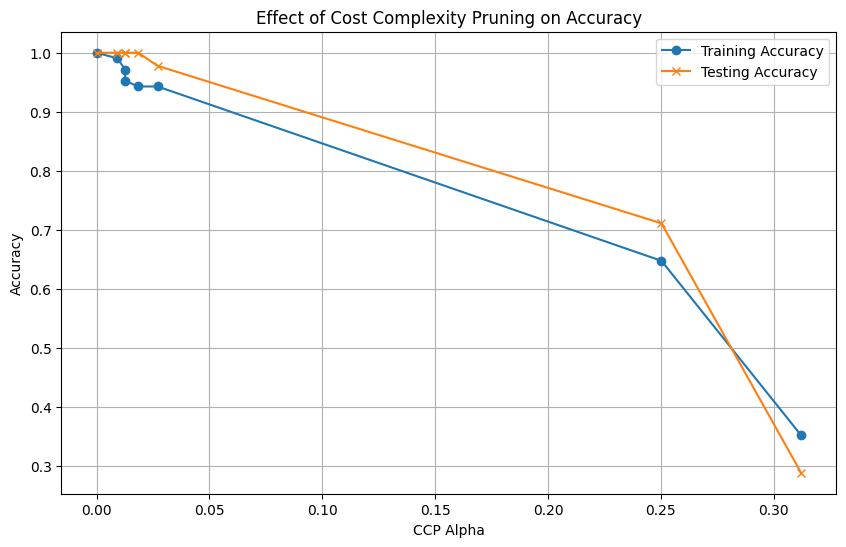

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Decision Tree Classifier (you can customize this)
clf = DecisionTreeClassifier(random_state=0)  # Add random_state for reproducibility

# Get the cost complexity pruning path
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas  # Different alpha values for pruning
impurities = path.impurities  # Impurities corresponding to alpha values

# Store accuracy scores for different alpha values
accuracies_train = []
accuracies_test = []

for ccp_alpha in ccp_alphas:
    clf_pruned = DecisionTreeClassifier(ccp_alpha=ccp_alpha, random_state=0) # Use the same random state
    clf_pruned.fit(X_train, y_train)

    y_pred_train = clf_pruned.predict(X_train)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracies_train.append(accuracy_train)

    y_pred_test = clf_pruned.predict(X_test)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    accuracies_test.append(accuracy_test)


# Visualize the effect of CCP on accuracy
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, accuracies_train, marker='o', label='Training Accuracy')
plt.plot(ccp_alphas, accuracies_test, marker='x', label='Testing Accuracy')
plt.xlabel('CCP Alpha')
plt.ylabel('Accuracy')
plt.title('Effect of Cost Complexity Pruning on Accuracy')
plt.legend()
plt.grid(True)
plt.show()



28. Write a Python program to train a Decision Tree Classifier and evaluate its performance using Precision, Recall, and F1-Score.


In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # random_state for reproducibility

# Create and train the Decision Tree Classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate precision, recall, and F1-score
# Important: Specify the 'average' parameter for multiclass classification
precision = precision_score(y_test, y_pred, average='weighted') # 'weighted' averages by support
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)







Precision: 1.0
Recall: 1.0
F1-score: 1.0


29. Write a Python program to train a Decision Tree Classifier and visualize the confusion matrix using seaborn.


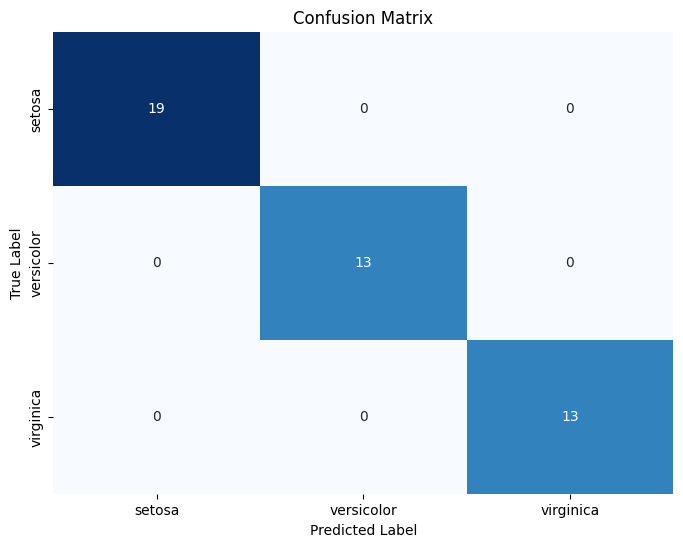

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the Decision Tree Classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))  # Adjust figure size for better visualization
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,  # Customize heatmap
            xticklabels=iris.target_names, yticklabels=iris.target_names) # Add class labels
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()



30. Write a Python program to train a Decision Tree Classifier and use GridSearchCV to find the optimal values for max_depth and min_samples_split.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameter grid to search
param_grid = {
    'max_depth': range(1, 11),  # Try max_depth from 1 to 10 (inclusive)
    'min_samples_split': range(2, 11) # Try min_samples_split from 2 to 10 (inclusive)
}

# Create a GridSearchCV object.  cv=5 means 5-fold cross-validation.
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy') # scoring='accuracy' for classification

# Perform the grid search
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

# Print the best accuracy score achieved
print("Best Accuracy:", grid_search.best_score_)

# --- Evaluate the model with the best hyperparameters on the test set ---
# Get the best estimator (the trained classifier with the best parameters)
best_clf = grid_search.best_estimator_

# Make predictions on the test set
y_pred_best = best_clf.predict(X_test)

from sklearn.metrics import accuracy_score
test_accuracy = accuracy_score(y_test, y_pred_best)
print("Test Accuracy with Best Hyperparameters:", test_accuracy)




Best Hyperparameters: {'max_depth': 4, 'min_samples_split': 6}
Best Accuracy: 0.9428571428571428
Test Accuracy with Best Hyperparameters: 1.0
